In [37]:
#các thư viện cần thiết
import matplotlib.pyplot as plt
import tensorflow as tf 
import pickle
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2

In [68]:
#load file image
from google.colab import files
upload = files.upload()

Saving data(fruit2).pickle to data(fruit2) (1).pickle


In [69]:
with open("data(fruit2).pickle","rb") as f:
  (X_train, Y_train)=pickle.load(f)

# with open("data_test(fruit2).pickle","rb") as f:
#   (X_test, Y_test)=pickle.load(f)

X_train = X_train[:4823]
Y_train = Y_train[:4823]
print(Y_train)



#preprocesing Data
X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
X_train /= 255
# X_test /= 255
#Encoding Y
Y_train = np_utils.to_categorical(Y_train)
# Y_test = np_utils.to_categorical(Y_test)
#shuffle Data
X_train, Y_train = shuffle(X_train,Y_train)
# X_test, Y_test = shuffle(X_test,Y_test)


[1 1 1 ... 9 9 9]


In [70]:
model = Sequential()
model.add(Conv2D(input_shape=(64,64,3), kernel_size=(2,2), padding='same',  filters=32))
model.add(MaxPooling2D(pool_size=(2,2),  padding='same'))

model.add(Conv2D( kernel_size=(2,2), padding='same',  filters=64))
model.add(MaxPooling2D(pool_size=(2,2),  padding='same'))

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))
model.add(Dropout(0.1))
model.summary()

from tensorflow.keras.optimizers import SGD
opt=SGD()

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size = 32, epochs=15, verbose=1)

# test_loss,test_acc=model.evaluate(X_test, Y_test)
# print("test accuracy: ",test_acc)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        8256      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 16384)             0         
                                                                 
 dense_18 (Dense)            (None, 256)             

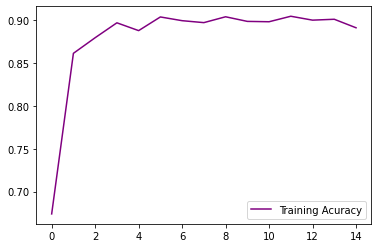

In [72]:
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(acc,color = 'purple',label = 'Training Acuracy')
# plt.plot(val_acc,color = 'blue',label = 'Validation Accuracy')
plt.legend()

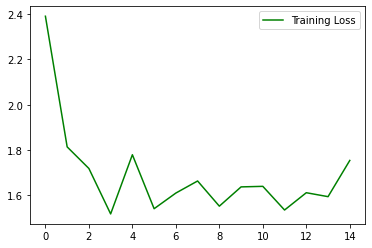

In [73]:
loss = history.history['loss']
# val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
# plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()

In [78]:
#lưu lại mô hình 
model.save('CNN_Fruit_final.h5')

In [74]:
classes=['Quả táo vàng ','Táo Braeburn','Quả mơ','Trái bơ','Trái chuối','Trái khế','Quả anh đào','Trái Quýt','Quả kiwi','Quả Đào']

In [84]:
from google.colab import files
upload = files.upload()


Saving r_99_100.jpg to r_99_100.jpg


đây là: Quả kiwi


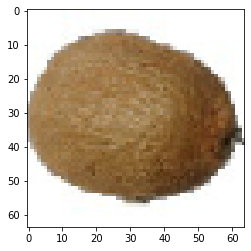

In [85]:
from keras import models
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
model_Fruit=models.load_model('CNN_Fruit_final.h5')

img = load_img('r_99_100.jpg', target_size=(64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3)
img = img.astype('float64')
img = img/ 255
print('đây là:',classes[np.argmax(model_Fruit.predict(img),axis=1)[0]])